In [1]:
# Import important libarery 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
pd.set_option('display.max_rows', None)

# Data Description 

In [2]:
# import dataset and add columm names to the imporated dataset

colName = ['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore',
           'DriversLicense','Citizen','ZipCode','Income','Approved']
df = pd.read_csv('https://raw.githubusercontent.com/abdo-projects/data-science-portfolio/main/Dataset/cc_approvals.data', names = colName)


# Show the the tope 5 obersrvation of the dataset
display(df.head(5))


,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
#Show data desccription

display(df.describe())

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [4]:
#show data shape

display(df.shape)

(690, 16)

In [5]:
# show data type

display(df.dtypes)

Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

-    383
+    307
Name: Approved, dtype: int64


<AxesSubplot:xlabel='Approved', ylabel='count'>

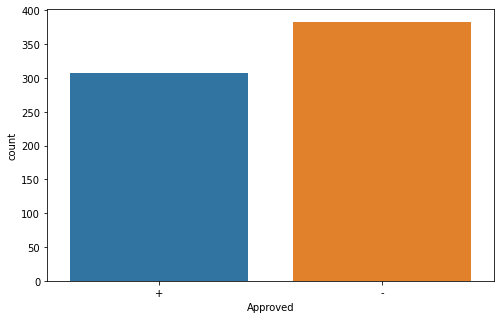

In [6]:
plt.figure(figsize=(8,5))
# count number of approved and non approved applications 

print(df['Approved'].value_counts())

# count rows of each classes

sns.countplot(x="Approved", data=df)

In [7]:
colName_cat = ['Male','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed',
           'DriversLicense','Citizen']
colName = ['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore',
           'DriversLicense','Citizen','ZipCode','Income','Approved']
for i in colName_cat:
    print("Attribute Names",i)
    print(df[i].value_counts())
    print("__________________")

Attribute Names Male
b    468
a    210
?     12
Name: Male, dtype: int64
__________________
Attribute Names Married
u    519
y    163
?      6
l      2
Name: Married, dtype: int64
__________________
Attribute Names BankCustomer
g     519
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64
__________________
Attribute Names EducationLevel
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64
__________________
Attribute Names Ethnicity
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64
__________________
Attribute Names PriorDefault
t    361
f    329
Name: PriorDefault, dtype: int64
__________________
Attribute Names Employed
f    395
t    295
Name: Employed, dtype: int64
__________________
Attribute Names DriversLicense
f    374
t    316
Name: DriversLicense, dtype: in

# Data Preparation 

In [8]:
# Replace the '?'s with NaN
df = df.replace('?', np.nan)

# Inspect the missing values again
# select rows from dataframe
x=df.iloc[:,:-1]
# sum of null data based on attributes
x.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
dtype: int64

In [9]:
df_clean= df.dropna(axis='rows')

# select rows from dataframe
x=df_clean.iloc[:,:-1]
# sum of null data based on attributes
x.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64

In [10]:
df_clean['Age'] = df_clean['Age'].apply(pd.to_numeric)
df['Age'] = df['Age'].apply(pd.to_numeric)
df_clean.dtypes

<ipython-input-10-6e11ca561a0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = df_clean['Age'].apply(pd.to_numeric)


Male               object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

In [11]:
# show data type

display(df.dtypes)

Male               object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

In [12]:
#Show data desccription

display(df.describe())

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [13]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df_clean.columns:
    # Compare if the dtype is object
    if df_clean[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df_clean[col] =le.fit_transform(df_clean[col])
print(df_clean.head(5))

   Male    Age   Debt  Married  BankCustomer  EducationLevel  Ethnicity  \
0     1  30.83  0.000        1             0              12          7   
1     0  58.67  4.460        1             0              10          3   
2     0  24.50  0.500        1             0              10          3   
3     1  27.83  1.540        1             0              12          7   
4     1  20.17  5.625        1             0              12          7   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

   Citizen  ZipCode  Income  Approved  
0        0       68       0         0  
1        0       11     560   

<ipython-input-13-faa1959c8ce5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] =le.fit_transform(df_clean[col])


In [14]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaled = scaler.fit_transform(df_clean)
df_rescaled = pd.DataFrame(rescaled)
df_rescaled.columns = ['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']
df_rescaled.head(5)


,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1.0,0.271111,0.000000,0.5,0.0,0.923077,0.875,0.043860,1.0,1.0,0.014925,0.0,0.0,0.417178,0.00000,0.0
1,0.0,0.713016,0.159286,0.5,0.0,0.769231,0.375,0.106667,1.0,1.0,0.089552,0.0,0.0,0.067485,0.00560,0.0
2,0.0,0.170635,0.017857,0.5,0.0,0.769231,0.375,0.052632,1.0,0.0,0.000000,0.0,0.0,0.576687,0.00824,0.0
3,1.0,0.223492,0.055000,0.5,0.0,0.923077,0.875,0.131579,1.0,1.0,0.074627,1.0,0.0,0.190184,0.00003,0.0
4,1.0,0.101905,0.200893,0.5,0.0,0.923077,0.875,0.060000,1.0,0.0,0.000000,0.0,1.0,0.226994,0.00000,0.0


(16.5, -0.5)

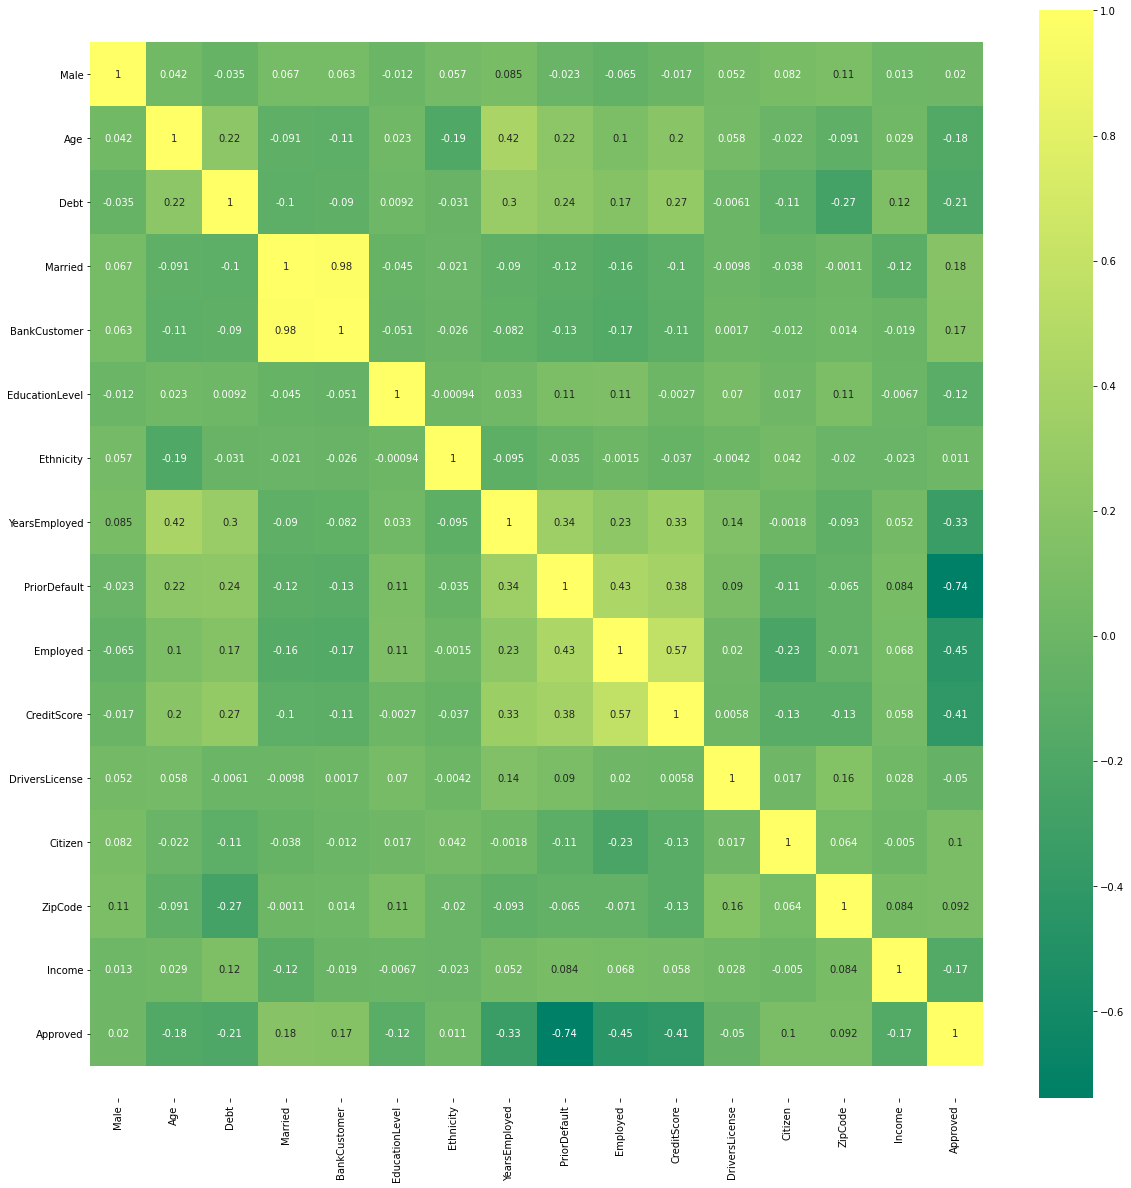

In [15]:
# correlations using heat map plot
plt.figure(figsize=(20,20))
ax = sns.heatmap(df_rescaled.corr(),annot=True,cmap='summer', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.savefig('heatplot.png')

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_rescaled.iloc[:,0:-1]  #independent columns
y = df_rescaled.iloc[:,-1:]    #target column i.e price range


In [17]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [18]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [19]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [20]:
display(featureScores.nlargest(15,'Score'))  #print 10 best features

,Specs,Score
8,PriorDefault,165.943905
9,Employed,74.730830
10,CreditScore,15.828746
4,BankCustomer,14.384287
7,YearsEmployed,12.824795
12,Citizen,6.022988
14,Income,5.297725
2,Debt,5.225372
1,Age,2.654313
5,EducationLevel,2.438256


In [21]:
print(featureScores.nlargest(15,'Score'))  #print 10 best features

             Specs       Score
8     PriorDefault  165.943905
9         Employed   74.730830
10     CreditScore   15.828746
4     BankCustomer   14.384287
7    YearsEmployed   12.824795
12         Citizen    6.022988
14          Income    5.297725
2             Debt    5.225372
1              Age    2.654313
5   EducationLevel    2.438256
3          Married    1.569597
13         ZipCode    1.226080
11  DriversLicense    0.877884
0             Male    0.079719
6        Ethnicity    0.012118


In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

<ipython-input-22-3c24cb938222>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesClassifier()

In [23]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01699112 0.05227627 0.06020699 0.01348416 0.01530918 0.05881953
 0.03228691 0.0664063  0.40838717 0.09624912 0.03488631 0.01753993
 0.0156647  0.06645929 0.04503302]


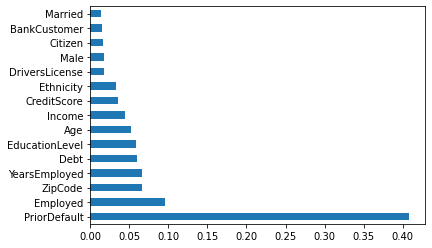

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [25]:
colName_cut = ['PriorDefault','Employed','CreditScore','BankCustomer','YearsEmployed','Income','Debt','Age','EducationLevel','Approved']
df_fit = df_rescaled[colName_cut]


X = df_fit.iloc[:,0:-1]  #independent columns
y = df_fit.iloc[:,-1:]    #target column i.e price range
from sklearn.model_selection import train_test_split
# split the data into training set and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(457, 9)

(196, 9)

(457, 1)

(196, 1)

# BY DEFAULT PARAMS - KNN

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        87
         1.0       0.92      0.90      0.91       109

    accuracy                           0.90       196
   macro avg       0.90      0.90      0.90       196
weighted avg       0.90      0.90      0.90       196



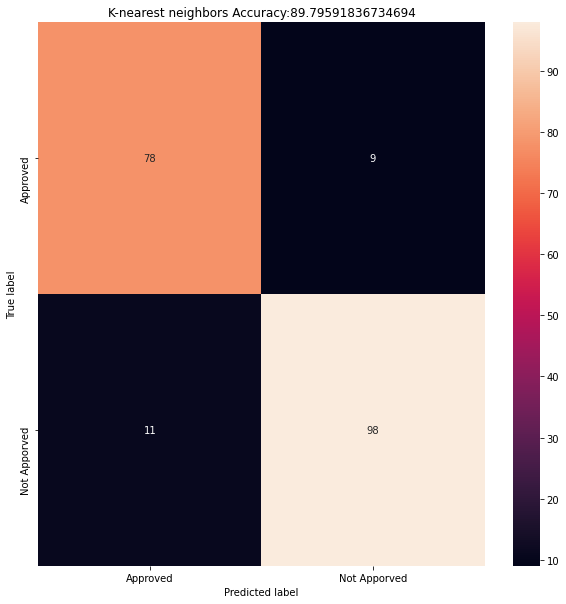

In [26]:
# import KNN model as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

#DEFAULT n_neighbors=5
knn=KNeighborsClassifier()
# input the train data to train KNN
knn.fit(x_train,y_train.values.ravel())
# see KNN prediction by inputting the test data
y_pred_knn=knn.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['Approved','Not Apporved'],
columns = ['Approved','Not Apporved'])
# plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("K-nearest neighbors Accuracy:" + str(knn.score(x_test,y_test)*100))
print(classification_report(y_test,y_pred_knn,labels=np.unique(y_pred_knn)))

# KNN with optimum parameters

In [27]:
from itertools import chain 

# empty variable for storing the KNN metrics
scores=[]
specificity=[]
# We try different values of k for the KNN (from k=1 up to k=21)
lrange=list(range(1,11))
# loop the KNN process
temp_y_test=list(chain.from_iterable(y_test.values.tolist()))
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    # input the train data to train KNN
    knn.fit(x_train,y_train.values.ravel())
    # see KNN prediction by inputting the test data
    y_pred=knn.predict(x_test)
    temp_y_pred=(y_pred.tolist())
    length = len(temp_y_pred)
    count_true_neg=0
    count_neg=0
    for i in range(length):
        if (temp_y_test[i]==1.0):
            count_neg += 1
        if temp_y_test[i]==1.0 and temp_y_pred[i]==1.0:
            count_true_neg += 1
    specificity.append(round((count_true_neg/count_neg)*100, 5))
    #score_knn = metrics.accuracy_score(y_test,y_pred)
    score_knn = round(knn.score(x_test,y_test)*100, 5)
    scores.append(round(score_knn, 5))
plt.figure(1,figsize=(15,5))

optimal_k = lrange[specificity.index(max(specificity))]
print("The optimal number K for specificity is %d" % optimal_k)

optimal_k = lrange[scores.index(max(scores))]
print("The optimal number K for Accuracy is %d" % optimal_k)

The optimal number K for specificity is 3
The optimal number K for Accuracy is 7


<Figure size 1080x360 with 0 Axes>

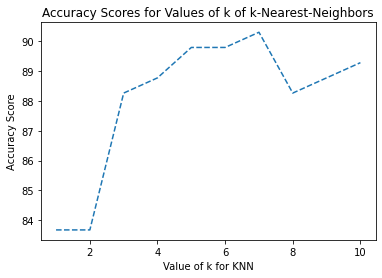

In [28]:
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

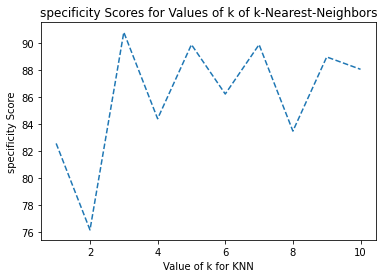

In [29]:
plt.plot(lrange, specificity,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('specificity Score')
plt.title('specificity Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [30]:
print(scores)
print(specificity)

[83.67347, 83.67347, 88.26531, 88.77551, 89.79592, 89.79592, 90.30612, 88.26531, 88.77551, 89.28571]
[82.56881, 76.14679, 90.82569, 84.40367, 89.90826, 86.23853, 89.90826, 83.48624, 88.99083, 88.07339]


              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        87
         1.0       0.88      0.91      0.90       109

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196



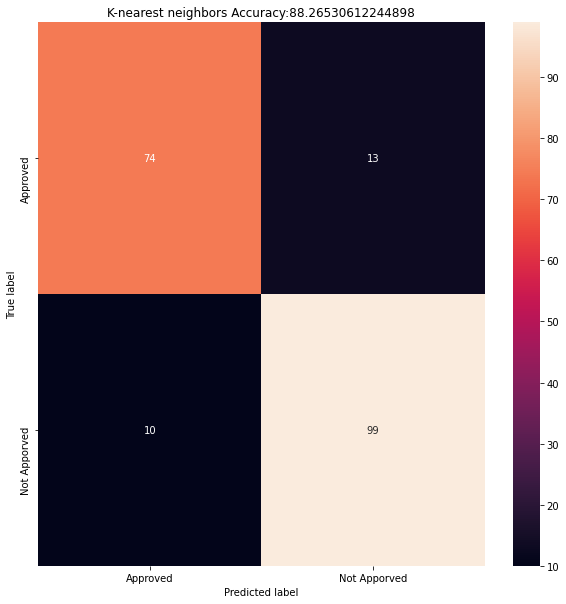

In [31]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

knn=KNeighborsClassifier(n_neighbors=3, weights= 'uniform')
# input the train data to train KNN
knn.fit(x_train,y_train.values.ravel())
# see KNN prediction by inputting the test data
y_pred_knn=knn.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['Approved','Not Apporved'],
columns = ['Approved','Not Apporved'])

# plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("K-nearest neighbors Accuracy:" + str(knn.score(x_test,y_test)*100))

print(classification_report(y_test,y_pred_knn,labels=np.unique(y_pred_knn)))